In [1]:
ROOT='/content/drive/MyDrive/Perceptron'

In [2]:
import os 
os.chdir(ROOT)

In [3]:
assert ROOT==os.getcwd()

In [4]:
os.getcwd()

'/content/drive/MyDrive/Perceptron'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from matplotlib.colors import ListedColormap
plt.style.use("fivethirtyeight")

In [6]:
class Perceptron:
  def __init__(self,lr,epochs):
    self.weights=np.random.randn(3)*1e-4
    print(f'initial weights before training{self.weights}')
    self.lr=lr
    self.epochs=epochs

  def activationFunction(self,inputs,weights):
    z=np.dot(inputs,weights)
    return np.where(z>0,1,0)  
  def fit(self,X,y):
    self.X=X
    self.y=y

    X_with_bias=np.c_[self.X,-np.ones((len(self.X),1))] #bias concates with the inputs
    print(f'X with bias vals:\n{X_with_bias}')


    for epoch in range(self.epochs):
        print('--'*10)
        print(f'for epochs: {epoch}')
        y_hat=self.activationFunction(X_with_bias,self.weights)
        print(f'predicted value after forward pass: {y_hat}')
        self.error=self.y-y_hat
        print(f'error: \n {self.error}')

        self.weights=self.weights + self.lr* np.dot(X_with_bias.T,self.error)
        print(f'Updated weights {self.weights} after epoch {epoch}')
        print("####"*10)

  def predict(self,X):
    X_with_bias=np.c_[X,-np.ones((len(X),1))]
    return self.activationFunction(X_with_bias,self.weights)
  def total_loss(self):
    total_loss1=np.sum(self.error)
    print(f'total loss: {total_loss1}')
    return total_loss1

In [7]:
def data(df):
  X=df.drop('y',axis=1)
  y=df['y']
  return X,y

In [8]:
And={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'y':[0,0,0,1],
    
}
df=pd.DataFrame(And)
df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [9]:
X,y=data(df)

In [10]:
X['X1']

0    0
1    0
2    1
3    1
Name: X1, dtype: int64

In [11]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [12]:
lr=0.3
epochs=10
model=Perceptron(lr=lr,epochs=epochs)

initial weights before training[ 1.57198264e-04  1.42024747e-05 -6.59142636e-05]


In [13]:
model.fit(X,y)

_=model.total_loss()



X with bias vals:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs: 0
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights [-0.2998428  -0.2999858   0.89993409] after epoch 0
########################################
--------------------
for epochs: 1
predicted value after forward pass: [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights [1.57198264e-04 1.42024747e-05 5.99934086e-01] after epoch 1
########################################
--------------------
for epochs: 2
predicted value after forward pass: [0 0 0 0]
error: 
 0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights [0.3001572  0.3000142  0.29993409] after epoch 2
########################################
--------------------
for epochs: 3
predicted value after forward pass: [0 1 1 1]
error: 
 0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights [1.57198264e

In [14]:
a=np.random.randn(3)*1e-4

In [15]:
s=np.random.randn(3)*1e-4

In [16]:
np.dot(np.c_[X,-np.ones((len(X),1))],s)

array([3.21002064e-05, 1.54248837e-05, 2.35032947e-04, 2.18357624e-04])

In [17]:
model.predict(X)

array([0, 0, 0, 1])

In [18]:
inputs=np.array([[0,1],[1,1]])
model.predict(inputs)

array([0, 1])

In [19]:
def save_model(model,filename):
  model_dir='models'
  os.makedirs(model_dir,exist_ok=True)
  filePath=os.path.join(model_dir,filename )
  joblib.dump(model,filePath)
  print(filePath)

In [20]:
save_model(model,'AND.model')

models/AND.model


In [21]:
load_model=joblib.load('models/AND.model')

In [22]:
load_model.predict(inputs)

array([0, 1])

In [23]:
OR={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'y':[0,1,1,1]
}
df=pd.DataFrame(OR)
df

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [24]:
X,y=data(df)
model_OR=Perceptron(lr=lr,epochs=epochs)
model_OR.fit(X,y)
_=model_OR.total_loss()

initial weights before training[ 8.65723841e-05 -2.55528847e-05  2.58120085e-05]
X with bias vals:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs: 0
predicted value after forward pass: [0 0 1 1]
error: 
 0    0
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights [ 8.65723841e-05  2.99974447e-01 -2.99974188e-01] after epoch 0
########################################
--------------------
for epochs: 1
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights [8.65723841e-05 2.99974447e-01 2.58120085e-05] after epoch 1
########################################
--------------------
for epochs: 2
predicted value after forward pass: [0 1 1 1]
error: 
 0    0
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights [8.65723841e-05 2.99974447e-01 2.58120085e-05] after epoch 2
########################################
--------------------
for epochs: 3
predicted value after forwar

In [25]:
XOR={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'y':[0,1,1,0]
}
df=pd.DataFrame(XOR)
df

,X1,X2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [26]:
X,y=data(df)

In [27]:
model_XOR=Perceptron(lr=lr,epochs=10)
model_XOR.fit(X,y)
_=model_XOR.total_loss()

initial weights before training[ 1.11833551e-05  1.31122061e-04 -2.93714831e-04]
X with bias vals:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs: 0
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights [-0.29998882 -0.29986888  0.59970629] after epoch 0
########################################
--------------------
for epochs: 1
predicted value after forward pass: [0 0 0 0]
error: 
 0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights [ 1.11833551e-05  1.31122061e-04 -2.93714831e-04] after epoch 1
########################################
--------------------
for epochs: 2
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights [-0.29998882 -0.29986888  0.59970629] after epoch 2
########################################
--------------------
for epochs: 3
predicted value after forward pass: [0 0 0 0]


In [62]:
def save_plot(df,file_name,model):
  def _create_base_plot(df):
    df.plot(kind='scatter',x='X1',y='X2',c='y',s=100,cmap='winter')
    plt.axhline(y=0,color='black',linestyle="--",linewidth=1)
    plt.axvline(x=0,color='black',linestyle="--",linewidth=1)
    figure=plt.gcf()
    figure.set_size_inches(10,8)

  def _plot_decision_region(X,y,classifier,resolution=0.02):
    colors=("red","blue","lightgreen","gray","cyan")
    cmap=ListedColormap(colors[:len(np.unique(y))])
    X=X.values
    x1min,x1max=X[:,0].min()-1,X[:,0].max()+1
    x2min,x2max=X[:,1].min()-1,X[:,1].max()+1
    print(x1min,x1max)
    print(x2min,x2max)
    xx1,xx2=np.meshgrid(np.arange(x1min,x1max,resolution),np.arange(x2min,x2max,resolution))
    print(xx1,xx2)
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.2,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    plt.plot()


  X,y=data(df)
  _create_base_plot(df)
  _plot_decision_region(X,y,model)
  plot_dir='plots'
  os.makedirs(plot_dir,exist_ok=True)
  plotPath=os.path.join(plot_dir,file_name)
  plt.savefig(plotPath)

In [29]:
OR={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'y':[0,1,1,1]
}
df_OR=pd.DataFrame(OR)
df_OR
X,y=data(df_OR)
model_OR=Perceptron(lr=lr,epochs=epochs)
model_OR.fit(X,y)
_=model_OR.total_loss()

initial weights before training[-8.08974607e-05  1.50978541e-04 -1.52093139e-04]
X with bias vals:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs: 0
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights [-8.08974607e-05  1.50978541e-04  2.99847907e-01] after epoch 0
########################################
--------------------
for epochs: 1
predicted value after forward pass: [0 0 0 0]
error: 
 0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weights [ 0.5999191   0.60015098 -0.60015209] after epoch 1
########################################
--------------------
for epochs: 2
predicted value after forward pass: [1 1 1 1]
error: 
 0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights [ 0.5999191   0.60015098 -0.30015209] after epoch 2
########################################
--------------------
for epochs: 3
predicted value after forward pass: [1 1 1 1]


-1 2
-1 2
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]] [[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.98 -0.98 -0.98 ... -0.98 -0.98 -0.98]
 [-0.96 -0.96 -0.96 ... -0.96 -0.96 -0.96]
 ...
 [ 1.94  1.94  1.94 ...  1.94  1.94  1.94]
 [ 1.96  1.96  1.96 ...  1.96  1.96  1.96]
 [ 1.98  1.98  1.98 ...  1.98  1.98  1.98]]


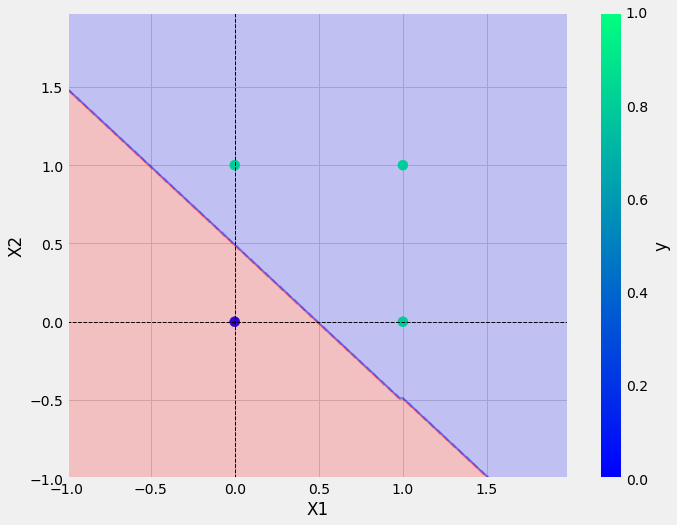

In [48]:
save_plot(df_OR,'OR.png',model_OR)

In [63]:
NAND={
    'X1':[0,0,1,1],
    'X2':[0,1,0,1],
    'y':[1,1,1,0]
}
df_NAND=pd.DataFrame(NAND)

In [64]:
X,y=data(df_NAND)

In [65]:
model_NAND=Perceptron(lr=lr,epochs=epochs)
model_NAND.fit(X,y)
_=model_NAND.total_loss()

initial weights before training[ 6.94181851e-05 -1.69897424e-05 -3.22405876e-05]
X with bias vals:
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epochs: 0
predicted value after forward pass: [1 1 1 1]
error: 
 0    0
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights [-0.29993058 -0.30001699  0.29996776] after epoch 0
########################################
--------------------
for epochs: 1
predicted value after forward pass: [0 0 0 0]
error: 
 0    1
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights [ 6.94181851e-05 -1.69897424e-05 -6.00032241e-01] after epoch 1
########################################
--------------------
for epochs: 2
predicted value after forward pass: [1 1 1 1]
error: 
 0    0
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights [-0.29993058 -0.30001699 -0.30003224] after epoch 2
########################################
--------------------
for epochs: 3
predicted value after forward pass: [1 1 1 0]


-1 2
-1 2
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]] [[-1.   -1.   -1.   ... -1.   -1.   -1.  ]
 [-0.98 -0.98 -0.98 ... -0.98 -0.98 -0.98]
 [-0.96 -0.96 -0.96 ... -0.96 -0.96 -0.96]
 ...
 [ 1.94  1.94  1.94 ...  1.94  1.94  1.94]
 [ 1.96  1.96  1.96 ...  1.96  1.96  1.96]
 [ 1.98  1.98  1.98 ...  1.98  1.98  1.98]]


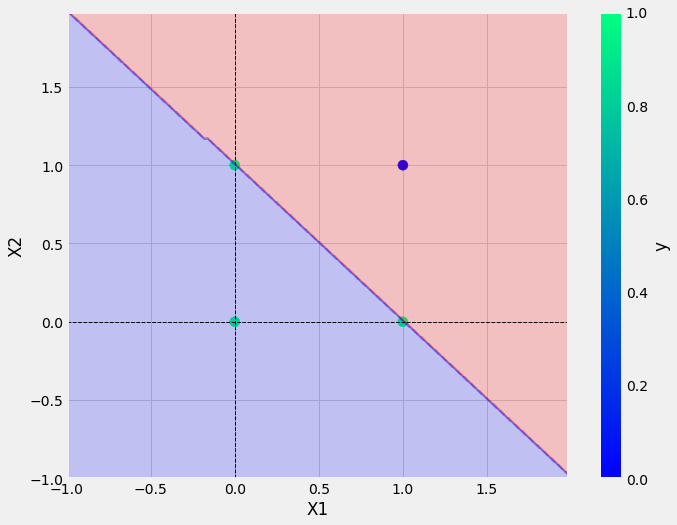

In [66]:
save_plot(df_NAND,'NAND.png',model_NAND)